In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, './python_helper_files/')
from post_processing_multi import * # Import data post processing functions
from plotting_helper_RQC import * # Import helper functions for plotting in ipynb
warnings.filterwarnings('ignore') # supress warnings for clenliness

# Loading data
Data is provided in a folder (or series of folders) and is loaded and processed with budget assignment by the ```load_multiple_files_budget``` function. This is wrapped in the load_max_cut_data. This takes a long time due to the large number of files that needs to be processed. If data were stored differently (i.e. in a database), this would be much faster. 

In [2]:
unfiltered_rqc_data = load_rqc_data()
filtered_rqc_data = filter_rqc_data(unfiltered_rqc_data)

## Figures from the main text

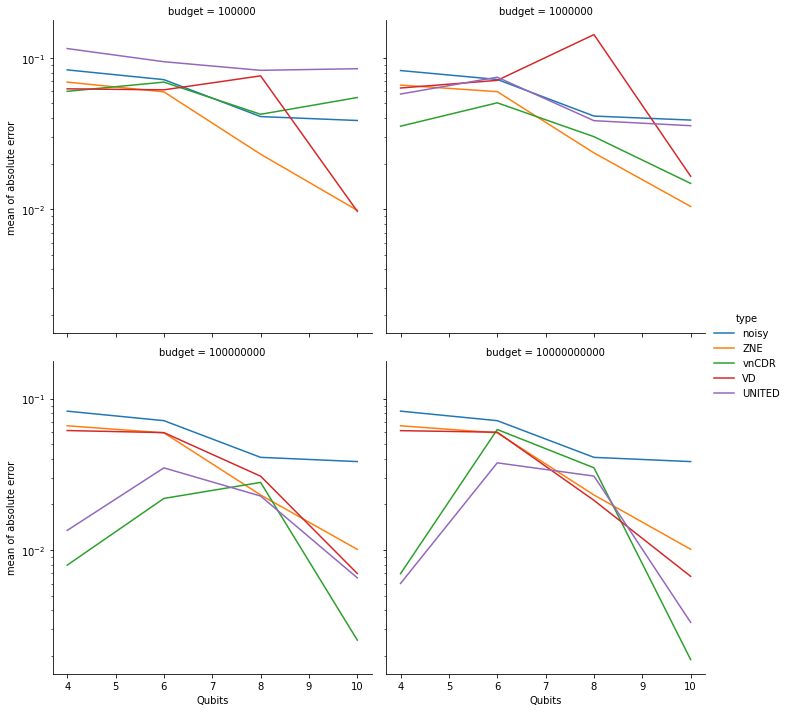

In [3]:
figure_2(filtered_rqc_data,'mean')

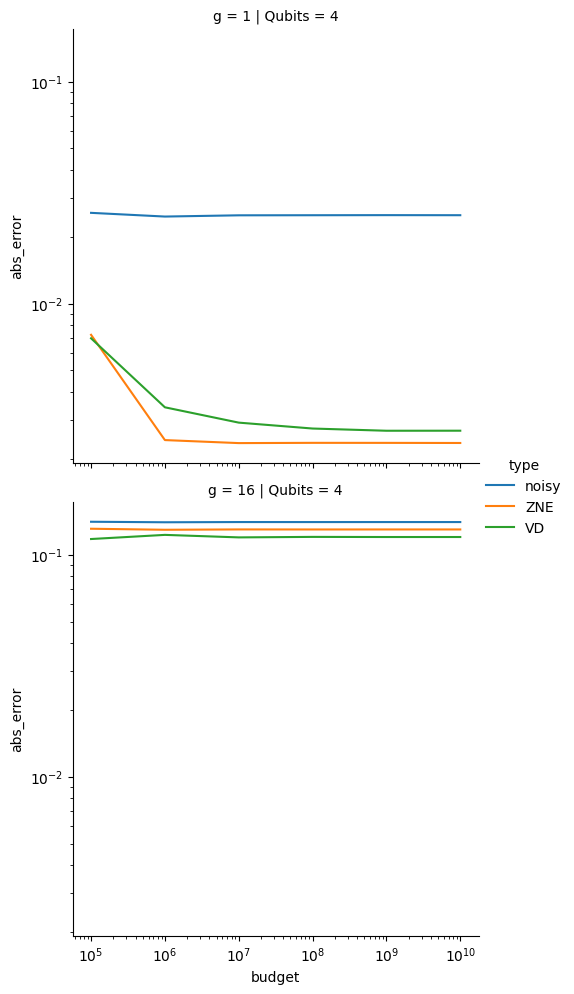

In [4]:
figure_3(filtered_rqc_data)

In [37]:
figure_7()

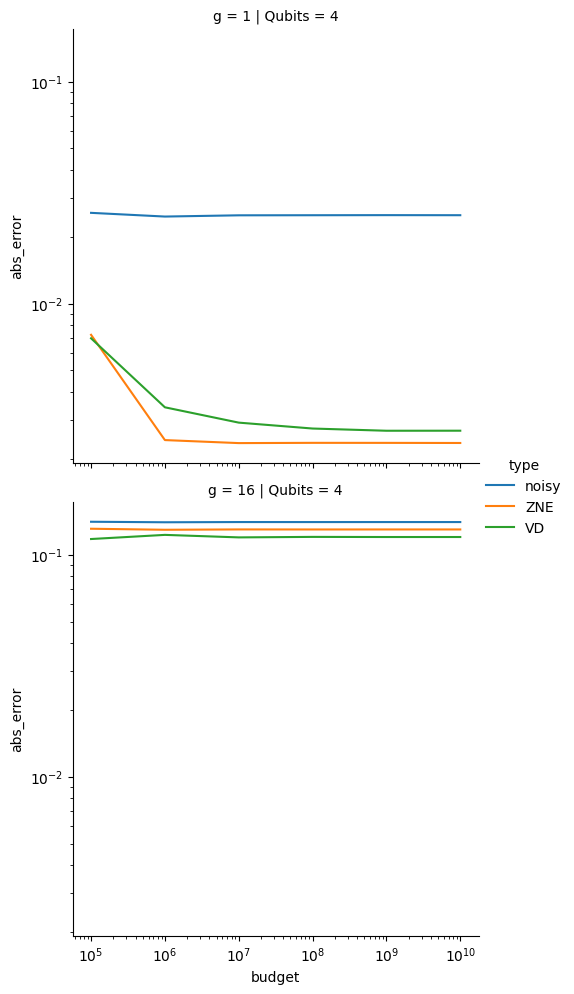

In [5]:
"""Plots figure 3, which is the performance of the techniques over budget. This is extended in the sense that it can return
all qubit results in a panel."""
df = filtered_rqc_data.query(f'Qubits==4 & description == "3nlsp_half"')

zero_copy_methods = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error" & ( type == "ZNE" )'
)
vnCDR = df.query('type == "vnCDR"&abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error"')
noisy = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1 & res_type=="abs_error" & ( type=="VD")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1 & copies==2 & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & copies==3 & res_type=="abs_error" & ( type=="UNITED")'
)

noisy["type"] = "noisy"
plot_df = pd.concat(
    [noisy, zero_copy_methods, few_copy_methods, many_copy_methods,vnCDR],
    axis=0,
    ignore_index=True,
)
fig = sns.relplot(
    data=plot_df.reset_index().query('budget>10**4&budget<10**11'),
    kind="line",
    x="budget",
    y="abs_error",
    hue="type",
    col="Qubits",
    row = 'g',
    estimator="mean",
    markers=True,
    ci=None).set(xscale='log',yscale='log')

In [17]:
filtered_rqc_data.query('type=="vnCDR"&budget==10**5')

,copies,type,shots,nlsp,res_type,seed,abs_error,Qubits,depth,budget,description,volume,g
7350,1,vnCDR,333,1,abs_error,0,0.088603,4,4,100000,3nlsp_full,64,1
7386,1,vnCDR,333,1,exact_value,0,-0.409489,4,4,100000,3nlsp_full,64,1
23550,1,vnCDR,333,1,abs_error,1,0.055864,4,4,100000,3nlsp_full,64,1
23586,1,vnCDR,333,1,exact_value,1,-0.311332,4,4,100000,3nlsp_full,64,1
39750,1,vnCDR,333,1,abs_error,2,0.060920,4,4,100000,3nlsp_full,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444791,6,vnCDR,333,1,exact_value,27,0.045103,10,10,100000,3nlsp_full,1000,1
460955,6,vnCDR,333,1,abs_error,28,0.043141,10,10,100000,3nlsp_full,1000,1
460991,6,vnCDR,333,1,exact_value,28,0.043615,10,10,100000,3nlsp_full,1000,1
477155,6,vnCDR,333,1,abs_error,29,0.042542,10,10,100000,3nlsp_full,1000,1


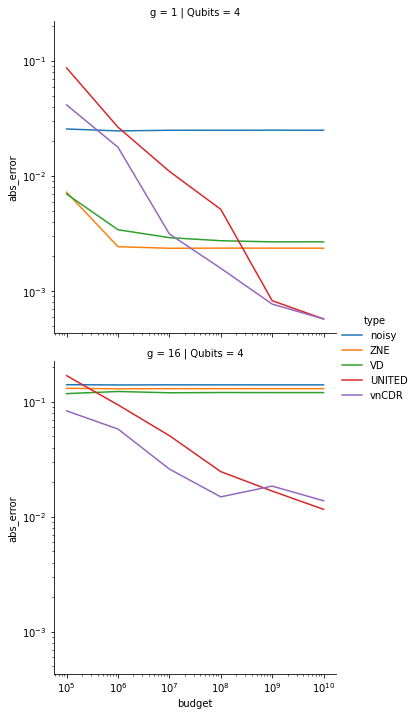

In [11]:
fig = sns.relplot(
    data=write.reset_index().query('budget>10**4&budget<10**11'),
    kind="line",
    x="budget",
    y="abs_error",
    hue="type",
    col="Qubits",
    row = 'g',
    estimator="median",
    markers=True,
    ci=None).set(xscale='log',yscale='log')

NameError: name 'write' is not defined

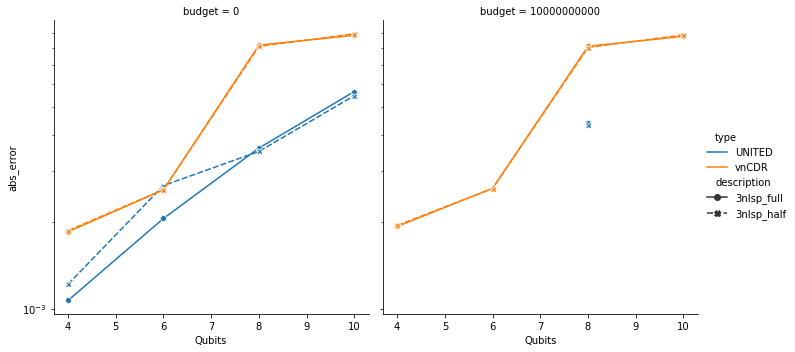

In [40]:
df = filtered_rqc


zero_copy_methods = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error" & ( type == "ZNE" )'
)
vnCDR = df.query('type == "vnCDR"&abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error"')
noisy = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1 & res_type=="abs_error" & ( type=="VD")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1 & copies==2 & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & copies==2 & res_type=="abs_error" & ( type=="UNITED")'
)
noisy["type"] = "noisy"
plot_df = pd.concat(
    [many_copy_methods,vnCDR],
    axis=0,
    ignore_index=True,
)
fig = sns.relplot(
    data=plot_df.reset_index().query('(budget==0|budget==10**10)&g==1'),
    kind="line",
    y="abs_error",
    x="Qubits",
    hue="type",
    style='description',
    col="budget",
    estimator='max', 
    col_wrap=2,
    markers=True,
    ci=None).set(yscale='log')